***What is mean by Outlier?***

Outlier-data point lies outside the overall distribution of the dataset.

Criteria to identify an outlier ?

1.Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile.

2.Data point that falls outside of 3 standard deviation ,we can use a z score and if the z score falls outside of 2 standard deviation

What is the reason for an outlier to exits in a dataset?

1.Variability in the data.

2.An experimental measurement error.

Impacts of having outliers in a dataset?

1.It causes various problems during our statistical analysis.


Methods to find the outliers.

1.Scatter plot

2.Box plot

3.Z score

4.IQR interquantile range

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [10]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#mean=50,std=10
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [12]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [20]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


***SCATTER PLOT***

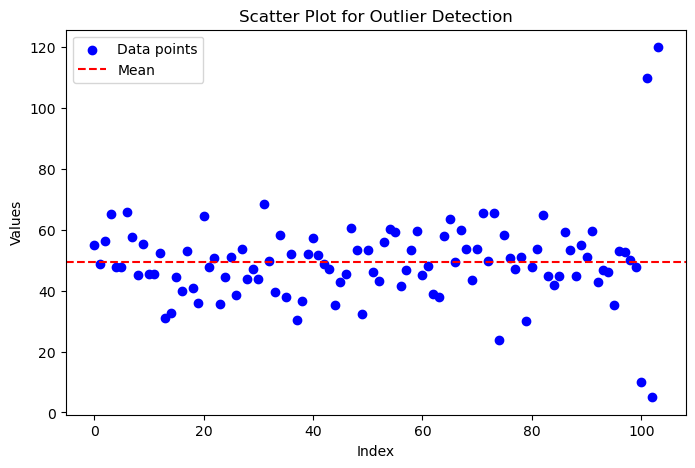

In [29]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

***BOX PLOT***

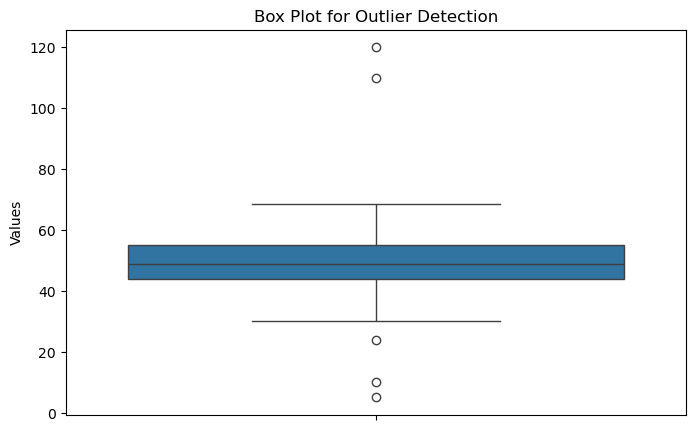

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box Plot for Outlier Detection")
plt.show()

***Z-Score Method***

The Z-score formula is:

z= X−μ/σ

Where:

z = Z-score of the data point

𝑋 = Data point

μ = Mean of the dataset

σ = Standard deviation of the dataset


In [57]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


***Interquartile Range(IQR) Method***

The IQR formula is:

    IQR = Q3 - Q1
    
Steps:

1.Calculate Q1(25th percentile) and Q3(75th percentile).

2.Compute IQR = Q3 - Q1.

3.Define lower & upper bounds:

             ** Lower Bound=Q1-1.5xIQR **
             
             ** Upper Bound=Q3+1.5xIQR **
             
4.Any value outside these bounds is an outlier.

In [70]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1

#Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identifying outliers
df['Outlier_IQR'] = df['Values'].apply(lambda x:'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')
print(df[df['Outlier_IQR']=='Outlier']) #Display detected outliers

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


***Final Summary***

1.Scatter PLot -> Outliers appear far from the main cluster

2.Box Plot -> Outliers are outside the whiskers.

3.Z-Score -> Values with Z > 3 or Z < -3 are outliers.

4.IQR Method -> Values outside [Q1-1.5xIQR,Q3+1.5xIQR] are outliers.

**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
    
 **Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**

In [81]:
import numpy as np
#Step 1:Create a dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)#mean=50,std=10
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

#Step 2:Compute the 5-number summary
Q1 = np.percentile(data,25)
Q2 = np.median(data)
Q3 = np.percentile(data,75)
min_value = np.min(data)
max_value = np.max(data)

#Step 3:Compute IQR
IQR = Q3 -Q2

#Step 4:Compute Outlier Boundaries
lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 +1.5 *IQR

#Step 5:Find Outliera
outliers = data[(data < lower_bound) | (data > upper_bound)]

#Step 6:Print Results
print(f"5-Number Summary:\nMin:{min_value},Q1: {Q1},Median (Q2):{Q2},Q3:{Q3},Max: {max_value}")
print(f"IQR:{IQR}")
print(f"Lower Bound:{lower_bound},Upper Bound:{upper_bound}")
print(f"Outliers:{outliers}")

5-Number Summary:
Min:5.0,Q1: 43.874401021766715,Median (Q2):48.73043708220287,Q3:55.00852473036764,Max: 120.0
IQR:6.278087648164771
Lower Bound:34.45726954951956,Upper Bound:64.42565620261479
Outliers:[ 65.23029856  65.79212816  30.86719755  32.75082167  64.65648769
  68.52278185  30.40329876  32.36959845  65.38036566  65.64643656
  23.80254896  30.12431085  64.77894045  10.         110.
   5.         120.        ]
